In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 7)

# Scikit-Learn ≥ 1.0.1 is required
from packaging import version
import sklearn
print(sklearn.__version__)
assert version.parse(sklearn.__version__) >= version.parse("1.0.1")

# Common imports
import numpy as np
import pandas as pd
import os

# To plot pretty figures
import matplotlib as mpl
import matplotlib.pyplot as plt

1.4.1.post1


In [2]:
solar = pd.read_csv("data/solar.csv")
solar.head()

,timestamp,kwh
0,2023-03-11 16:00:10.160454+01,0.54
1,2023-03-11 17:00:10.217795+01,1.02
2,2023-03-11 18:00:10.284064+01,1.17
3,2023-03-11 19:00:10.224836+01,1.18
4,2023-03-11 20:00:10.201847+01,1.18


In [3]:
sun = pd.read_excel("data/sunrise-sunset.xlsx")
sun.head()

,datum,Opkomst,Op ware middag,Ondergang
0,2023-01-01,08:45:00,12:46:00,16:47:00
1,2023-01-02,08:45:00,12:46:00,16:48:00
2,2023-01-03,08:45:00,12:47:00,16:49:00
3,2023-01-04,08:44:00,12:47:00,16:51:00
4,2023-01-05,08:44:00,12:48:00,16:52:00


In [4]:
weather = pd.read_csv("data/weather.csv")
weather.head()

,FID,the_geom,code,timestamp,precip_quantity,precip_range,temp,temp_min,temp_max,temp_grass_min,...,wind_speed_unit,wind_direction,wind_peak_speed,humidity_relative,weather_current,pressure,pressure_station_level,sun_duration_24hours,short_wave_from_sky_24hours,cloudiness
0,synop_data.6407.2023-02-28 23:00:00+00,POINT (51.200341 2.887306),6407,2023-02-28T23:00:00,NaN,NaN,-0.3,NaN,NaN,NaN,...,1,50.0,4.0,NaN,NaN,1031.8,1031.2,NaN,NaN,1.0
1,synop_data.6418.2023-02-28 23:00:00+00,POINT (51.347375 3.201846),6418,2023-02-28T23:00:00,NaN,NaN,4.6,NaN,NaN,NaN,...,1,37.9,6.8,61.8,NaN,1031.9,1030.2,NaN,NaN,0.0
2,synop_data.6414.2023-02-28 23:00:00+00,POINT (50.90398 3.121692),6414,2023-02-28T23:00:00,NaN,NaN,-0.3,NaN,NaN,NaN,...,1,19.2,2.7,72.5,NaN,1031.9,1028.5,NaN,NaN,NaN
3,synop_data.6434.2023-02-28 23:00:00+00,POINT (50.980293 3.816003),6434,2023-02-28T23:00:00,NaN,NaN,-2.6,NaN,NaN,NaN,...,1,23.6,3.1,78.4,NaN,1031.5,1029.3,NaN,NaN,NaN
4,synop_data.6434.2023-03-01 00:00:00+00,POINT (50.980293 3.816003),6434,2023-03-01T00:00:00,0.0,1.0,-0.5,NaN,NaN,NaN,...,1,27.9,3.8,72.8,NaN,1031.7,1029.6,401.0,10335800.0,NaN


In [5]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32808 entries, 0 to 32807
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   FID                          32808 non-null  object 
 1   the_geom                     32808 non-null  object 
 2   code                         32808 non-null  int64  
 3   timestamp                    32808 non-null  object 
 4   precip_quantity              5331 non-null   float64
 5   precip_range                 5443 non-null   float64
 6   temp                         32808 non-null  float64
 7   temp_min                     1368 non-null   float64
 8   temp_max                     1361 non-null   float64
 9   temp_grass_min               1020 non-null   float64
 10  wind_speed                   32795 non-null  float64
 11  wind_speed_unit              32808 non-null  int64  
 12  wind_direction               32419 non-null  float64
 13  wind_peak_speed 

In [6]:
print(len(weather))
weather = weather.groupby("timestamp").mean().reset_index()
print(len(weather))

32808
8202


C:\Users\jules\AppData\Local\Temp\ipykernel_4424\2263670035.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  weather = weather.groupby("timestamp").mean().reset_index()


In [7]:
weather["timestamp"] = pd.to_datetime(weather["timestamp"], utc=True)
solar["timestamp"] = pd.to_datetime(solar["timestamp"], utc=True)
data = pd.merge_asof(solar, weather, on="timestamp", direction="nearest")

In [8]:
# drop columns with more than 70% missing values
data = data.dropna(thresh=0.3*len(weather), axis=1)
# drop useless columns
data.drop(columns=["code", "wind_speed_unit", "wind_direction", "pressure_station_level"], axis=1, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7907 entries, 0 to 7906
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   timestamp          7907 non-null   datetime64[ns, UTC]
 1   kwh                7907 non-null   float64            
 2   temp               7907 non-null   float64            
 3   wind_speed         7907 non-null   float64            
 4   wind_peak_speed    7907 non-null   float64            
 5   humidity_relative  7907 non-null   float64            
 6   pressure           7907 non-null   float64            
 7   cloudiness         7907 non-null   float64            
dtypes: datetime64[ns, UTC](1), float64(7)
memory usage: 556.0 KB


In [9]:
# clean weather timestamp data
data["timestamp"] = data["timestamp"].apply(lambda date: pd.to_datetime(date).strftime("%Y-%m-%d %H"))
# split timestamp into date and hour
data["date"] = data["timestamp"].apply(lambda date: date.split(" ")[0])
data["hour"] = data["timestamp"].apply(lambda date: date.split(" ")[1])
data.drop(columns=["timestamp"], inplace=True)
data.head()

,kwh,temp,wind_speed,wind_peak_speed,humidity_relative,pressure,cloudiness,date,hour
0,0.54,6.85,2.17200,5.525,54.833333,1012.025,6.0,2023-03-11,15
1,1.02,6.30,1.80350,3.675,57.800000,1011.625,7.0,2023-03-11,16
2,1.17,5.95,1.98875,3.925,60.366667,1011.500,7.0,2023-03-11,17
3,1.18,5.25,1.93150,5.525,64.500000,1011.850,7.0,2023-03-11,18
4,1.18,4.85,2.55400,3.475,68.633333,1011.650,7.0,2023-03-11,19


In [10]:
# kwh is cummulative
# we need to calculate the daily kwh
data["kwh"] = data["kwh"] - data["kwh"].shift(1, fill_value=0)
data.head()

,kwh,temp,wind_speed,wind_peak_speed,humidity_relative,pressure,cloudiness,date,hour
0,0.54,6.85,2.17200,5.525,54.833333,1012.025,6.0,2023-03-11,15
1,0.48,6.30,1.80350,3.675,57.800000,1011.625,7.0,2023-03-11,16
2,0.15,5.95,1.98875,3.925,60.366667,1011.500,7.0,2023-03-11,17
3,0.01,5.25,1.93150,5.525,64.500000,1011.850,7.0,2023-03-11,18
4,0.00,4.85,2.55400,3.475,68.633333,1011.650,7.0,2023-03-11,19


In [11]:
mean = data["kwh"].mean()
std = data["kwh"].std()
print(len(data))
# remove outliers
data = data[abs(data["kwh"] - mean) < std]
print(len(data))
data.describe()

7907
7904


,kwh,temp,wind_speed,wind_peak_speed,humidity_relative,pressure,cloudiness
count,7904.000000,7904.000000,7904.000000,7904.000000,7904.000000,7904.000000,7904.000000
mean,0.243170,12.571340,4.975988,8.633541,80.888445,1013.839594,5.300671
std,0.455937,5.957563,2.342324,4.018088,13.077690,11.561503,2.428718
min,0.000000,-4.650000,0.261000,1.250000,31.366667,967.800000,0.000000
25%,0.000000,8.650000,3.162937,5.575000,73.125000,1008.075000,3.000000
50%,0.000000,12.225000,4.658375,8.050000,84.333333,1015.900000,6.500000
75%,0.238000,16.875000,6.503250,11.075000,91.566667,1021.700000,7.000000
max,2.098000,30.975000,16.915250,28.625000,99.033333,1041.275000,8.000000


In [12]:
sun.rename(columns={"datum": "date", "Opkomst": "sunrise", "Op ware middag": "sun_noon", "Ondergang": "sunset"}, inplace=True)
# make date column a string
sun["date"] = sun["date"].apply(lambda date: date.strftime("%Y-%m-%d"))
sun.head()

,date,sunrise,sun_noon,sunset
0,2023-01-01,08:45:00,12:46:00,16:47:00
1,2023-01-02,08:45:00,12:46:00,16:48:00
2,2023-01-03,08:45:00,12:47:00,16:49:00
3,2023-01-04,08:44:00,12:47:00,16:51:00
4,2023-01-05,08:44:00,12:48:00,16:52:00


In [13]:
# change timestamps to difference in minutes from minimum timestamp
sun["sunrise"] = sun["sunrise"].apply(lambda time: time.hour*60 + time.minute)
sunrise_min = sun["sunrise"].min()
sun["sunrise"] = sun["sunrise"] - sunrise_min

sun["sun_noon"] = sun["sun_noon"].apply(lambda time: time.hour*60 + time.minute)
sun_noon_min = sun["sun_noon"].min()
sun["sun_noon"] = sun["sun_noon"] - sun_noon_min

sun["sunset"] = sun["sunset"].apply(lambda time: time.hour*60 + time.minute)
sunset_min = sun["sunset"].min()
sun["sunset"] = sun["sunset"] - sunset_min
sun.head()

,date,sunrise,sun_noon,sunset
0,2023-01-01,196,20,10
1,2023-01-02,196,20,11
2,2023-01-03,196,21,12
3,2023-01-04,195,21,14
4,2023-01-05,195,22,15


In [14]:
# merge all data
data = data.merge(sun, on=["date"], how="inner")
print(data.shape)

(7904, 12)


In [15]:
# convert date to datetime
data["date"] = data["date"].astype("datetime64")
# add month and day columns
data["month"] = data["date"].dt.month
data["day"] = data["date"].dt.dayofweek
# drop date column
data.drop("date", axis=1, inplace=True)
# convert hour to int
data["hour"] = data["hour"].astype("int")

<Axes: >

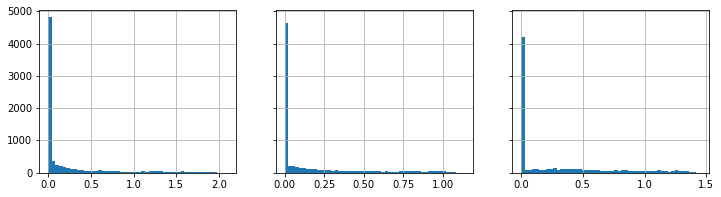

In [16]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3), sharey=True)
data["kwh"].hist(bins=50, ax=axs[0])
data["kwh"].apply(np.log1p).hist(bins=50, ax=axs[1])
data["kwh"].apply(np.sqrt).hist(bins=50, ax=axs[2])


In [17]:
X = data.drop("kwh", axis=1)
y = data["kwh"]

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
cm = data.corr()
cm["kwh"].sort_values(ascending=False).round(2)

kwh                  1.00
temp                 0.40
sunset               0.27
sun_noon             0.24
pressure             0.19
hour                 0.06
wind_speed           0.04
wind_peak_speed      0.01
day                 -0.01
month               -0.09
sunrise             -0.26
cloudiness          -0.28
humidity_relative   -0.65
Name: kwh, dtype: float64

In [20]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6323 entries, 4877 to 7270
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   temp               6323 non-null   float64
 1   wind_speed         6323 non-null   float64
 2   wind_peak_speed    6323 non-null   float64
 3   humidity_relative  6323 non-null   float64
 4   pressure           6323 non-null   float64
 5   cloudiness         6323 non-null   float64
 6   hour               6323 non-null   int32  
 7   sunrise            6323 non-null   int64  
 8   sun_noon           6323 non-null   int64  
 9   sunset             6323 non-null   int64  
 10  month              6323 non-null   int64  
 11  day                6323 non-null   int64  
dtypes: float64(6), int32(1), int64(5)
memory usage: 617.5 KB


In [21]:
# make hour, month, day categorical
X_train["hour"] = X_train["hour"].astype("category")
X_train["month"] = X_train["month"].astype("category")
X_train["day"] = X_train["day"].astype("category")
X_train["cloudiness"] = X_train["cloudiness"].astype("category")

In [22]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import FunctionTransformer

num_attribs = X_train.select_dtypes(include=np.number).columns
cat_attribs = X_train.select_dtypes(include="category").columns

num_pipeline = Pipeline([
    ("impute", SimpleImputer(strategy="median")),
    ("standardize", StandardScaler())
])

# log_pipeline = Pipeline([
#     ("impute", SimpleImputer(strategy="median")),
#     ("log", FunctionTransformer(np.log, inverse_func=np.exp)),
#     ("standardize", StandardScaler())
# ])

cat_pipline = Pipeline([
    ("impute", SimpleImputer(strategy="most_frequent")), 
    ("one_hot", OneHotEncoder(handle_unknown="ignore"))
])

preprocessing = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", cat_pipline, cat_attribs)
])

In [23]:
# Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.compose import TransformedTargetRegressor

sqrt_transformer = FunctionTransformer(np.sqrt, inverse_func=np.square)

lin_reg = Pipeline([
    ("preprocessing", preprocessing),
    ("lin_reg", TransformedTargetRegressor(LinearRegression(), transformer=sqrt_transformer))
])

lin_reg.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardize',
                                                                   StandardScaler())]),
                                                  Index(['temp', 'wind_speed', 'wind_peak_speed', 'humidity_relative',
       'pressure', 'sunrise', 'sun_noon', 'sunset'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('one_hot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['cloudiness', 'hour', 'month', 'day'], dtype='object'))])),
                ('lin_reg',
                 TransformedTargetRegressor(regressor=LinearRegression(),
                                            transformer=FunctionTransformer(func=<ufunc 'sqrt'>,
                                                                            inverse_func=<ufunc 'square'>)))])

In [24]:
# cross validation for linear regression
from sklearn.model_selection import cross_val_score

scores = -cross_val_score(lin_reg, X_train, y_train, scoring="neg_root_mean_squared_error", cv=10)
print("Linear Regression cross validation RMSE: ", scores.mean())

Linear Regression cross validation RMSE:  0.1945606557956676


In [25]:
from sklearn.metrics import root_mean_squared_error

y_test_pred = lin_reg.predict(X_test)
rmse = root_mean_squared_error(y_test, y_test_pred)
print("Linear Regression RMSE on test set: ", rmse)

Linear Regression RMSE on test set:  0.216069350976476


In [26]:
y_train_pred = lin_reg.predict(X_train)
rmse = root_mean_squared_error(y_train, y_train_pred)
print("Linear Regression RMSE on training set: ", rmse)

Linear Regression RMSE on training set:  0.19296620510675133


In [27]:
# Random Forest
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

forest_reg = Pipeline([
    ("preprocessing", preprocessing),
    ("forest_reg", RandomForestRegressor(random_state=42))
])

param_grid = [
    # try 9 (3×3) combinations of hyperparameters with bootstrap set as True (default)
    {"forest_reg__n_estimators": [300, 400], "forest_reg__max_features": [18, 20, 22]},
]

grid_search = GridSearchCV(forest_reg, param_grid, cv=5, scoring="neg_root_mean_squared_error")
grid_search.fit(X_train, y_train)

print("Random Forest best parameters: ", grid_search.best_params_)
print("Random Forest best score: ", -grid_search.best_score_)

Random Forest best parameters:  {'forest_reg__max_features': 22, 'forest_reg__n_estimators': 300}
Random Forest best score:  0.16487929259378714


In [28]:
cv_res = pd.DataFrame(grid_search.cv_results_)
cv_res.sort_values(by="mean_test_score", ascending=False, inplace=True)
cv_res.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_forest_reg__max_features,param_forest_reg__n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
4,17.956684,0.285193,0.081422,0.002273,22,300,"{'forest_reg__max_features': 22, 'forest_reg__...",-0.167004,-0.163276,-0.156444,-0.171151,-0.166521,-0.164879,0.004904,1
3,22.756006,0.277207,0.107004,0.001980,20,400,"{'forest_reg__max_features': 20, 'forest_reg__...",-0.166453,-0.163227,-0.155538,-0.172510,-0.166776,-0.164901,0.005555,2
5,27.526019,2.519656,0.116664,0.006942,22,400,"{'forest_reg__max_features': 22, 'forest_reg__...",-0.167227,-0.163130,-0.156382,-0.171562,-0.166647,-0.164990,0.005070,3
2,17.075762,0.243098,0.087928,0.006071,20,300,"{'forest_reg__max_features': 20, 'forest_reg__...",-0.167073,-0.163345,-0.155730,-0.173156,-0.167108,-0.165282,0.005719,4
1,23.198662,2.144196,0.113379,0.009375,18,400,"{'forest_reg__max_features': 18, 'forest_reg__...",-0.167779,-0.164596,-0.155474,-0.173342,-0.168944,-0.166027,0.005975,5


In [29]:
model = grid_search.best_estimator_
feature_importances = model["forest_reg"].feature_importances_
sorted(zip(feature_importances, model["preprocessing"].get_feature_names_out()), reverse=True)

[(0.3287930311704897, 'num__humidity_relative'),
 (0.10275213970258677, 'num__temp'),
 (0.057260012188235454, 'cat__hour_12.0'),
 (0.05271119287235522, 'cat__hour_11.0'),
 (0.04469571289852025, 'cat__hour_13.0'),
 (0.044668072224405456, 'cat__hour_14.0'),
 (0.04127531407426409, 'num__pressure'),
 (0.03932478896947866, 'num__sunset'),
 (0.027815753628885394, 'cat__hour_10.0'),
 (0.02729453063492016, 'num__sunrise'),
 (0.027206636162557807, 'num__sun_noon'),
 (0.023416364916830537, 'num__wind_speed'),
 (0.019426359249172295, 'cat__hour_15.0'),
 (0.019320384719570136, 'num__wind_peak_speed'),
 (0.017479071115949096, 'cat__hour_18.0'),
 (0.014072251053182801, 'cat__hour_16.0'),
 (0.012572214151657914, 'cat__hour_19.0'),
 (0.012445787611280268, 'cat__hour_9.0'),
 (0.009683561227728427, 'cat__hour_17.0'),
 (0.006860174915139344, 'cat__cloudiness_7.0'),
 (0.00561423493034826, 'cat__month_5.0'),
 (0.005182324038773882, 'cat__cloudiness_8.0'),
 (0.004743127299020244, 'cat__hour_8.0'),
 (0.00408

In [30]:
y_test_pred = model.predict(X_test)
rmse = root_mean_squared_error(y_test, y_test_pred)
print("Random Forest RMSE on test set: ", rmse)

Random Forest RMSE on test set:  0.17509997646329534


In [31]:
y_train_pred = model.predict(X_train)
rmse = root_mean_squared_error(y_train, y_train_pred)
print("Random Forest RMSE on training set: ", rmse)

Random Forest RMSE on training set:  0.05967879535848933
